In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# SQL
import sqlite3

# REMOVER AVISOS
import warnings
warnings.filterwarnings('ignore')

# ESTILO GRAFICOS
# plt.style.use('seaborn-dark')


In [2]:
teste = pd.read_csv('glp-2020-01.csv',sep=";")
teste.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,MG,SAO SEBASTIAO DO PARAISO,REDE DE POSTOS ZERO IV LTDA.,00.883.226/0001-88,RODOVIA BR 491 KM 03,3101,NaN,ITAMARATI,37950-000,GLP,02/01/2020,65,NaN,R$ / 13 kg,COPAGAZ
1,S,RS,SANTA MARIA,SANTA LUCIA COMERCIO E PAVIMENTACOES LTDA,87.305.868/0001-88,RODOVIA RS 509,1200,KM 03,JOÃO GOULART,97095-000,GLP,03/01/2020,80,NaN,R$ / 13 kg,ULTRAGAZ
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GLP,03/01/2020,82,"70,02",R$ / 13 kg,AMAZONGÁS


In [3]:
teste.shape

(114241, 16)

In [4]:
teste.isnull().sum()

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua              17
Complemento          87070
Bairro                   0
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      84916
Unidade de Medida        0
Bandeira                 0
dtype: int64

In [5]:
teste.dtypes

Regiao - Sigla       object
Estado - Sigla       object
Municipio            object
Revenda              object
CNPJ da Revenda      object
Nome da Rua          object
Numero Rua           object
Complemento          object
Bairro               object
Cep                  object
Produto              object
Data da Coleta       object
Valor de Venda       object
Valor de Compra      object
Unidade de Medida    object
Bandeira             object
dtype: object

In [6]:
teste['Regiao - Sigla'].unique()

array(['SE', 'S', 'N', 'NE', 'CO'], dtype=object)

In [7]:
teste['Estado - Sigla'].unique()

array(['MG', 'RS', 'AC', 'AL', 'AM', 'BA', 'DF', 'ES', 'GO', 'MA', 'MS',
       'MT', 'PA', 'PB', 'PI', 'PR', 'RN', 'RO', 'SP', 'AP', 'CE', 'TO',
       'RJ', 'SC', 'SE', 'PE', 'RR'], dtype=object)

In [8]:
# amostra dos dados
linhas = teste.shape[0]
colunas = teste.shape[1]

valores_nulos = teste.isnull().sum()
total_nulos = valores_nulos.sum()
colunas_nulas = valores_nulos[valores_nulos > 0].index

tipo_colunas = teste.dtypes

regioes = teste['Regiao - Sigla'].unique()
estados = teste['Estado - Sigla'].unique()

dicionario = {
    'total de registros':linhas,
    'total de colunas':colunas,
    'total de registros nulos': total_nulos,
    'total de colunas nulas': [colunas_nulas],
    'tipo campos':[tipo_colunas],
    'estatistica regiao': [regioes],
    'estatistica estados': [estados]
}

pd.DataFrame(dicionario, index=[0])

,total de registros,total de colunas,total de registros nulos,total de colunas nulas,tipo campos,estatistica regiao,estatistica estados
0,114241,16,172003,"Index(['Numero Rua', 'Complemento', 'Valor de ...",Regiao - Sigla object Estado - Sigla ...,"[SE, S, N, NE, CO]","[MG, RS, AC, AL, AM, BA, DF, ES, GO, MA, MS, M..."


In [9]:
valores_nulos[valores_nulos > 0].index

Index(['Numero Rua', 'Complemento', 'Valor de Compra'], dtype='object')

In [10]:
def validar_arquivo(base_dados, nome_arquivo):
    '''
    função para validar a estrutura dos arquivos para carga
    '''
    linhas = base_dados.shape[0]
    colunas = base_dados.shape[1]

    valores_nulos = base_dados.isnull().sum()
    total_nulos = valores_nulos.sum()
    colunas_nulas = valores_nulos[valores_nulos > 0].index

    tipo_colunas = base_dados.dtypes

    regioes = base_dados['Regiao - Sigla'].unique()
    estados = base_dados['Estado - Sigla'].unique()
    nome_arquivo = str(nome_arquivo)
    data = datetime.datetime.now().date()
    hora = datetime.datetime.now().time()

    dicionario = {
        'total de registros':linhas,
        'total de colunas':colunas,
        'total de registros nulos': total_nulos,
        'total de colunas nulas': [colunas_nulas],
        'tipo campos':[tipo_colunas],
        'estatistica regiao': [regioes],
        'estatistica estados': [estados],
        'nome_arquivo':nome_arquivo,
        'data':data,
        'hora': hora
    }
    log = pd.DataFrame(dicionario, index=[0])

    return log

In [11]:
# estrutura para consolidar os arquivos baixados

# caminho para buscar os arquivos
local = 'C:\\Users\\eluir\\Desktop\\MasterClass\\'

# variaveis de apoio
base_consolidado = pd.DataFrame()
base_log = pd.DataFrame()

# loop para percorrer o diretorio

for diretorio, subpastas, arquivos in os.walk(local):
    for arquivo in arquivos:
        if '.csv' and 'glp' in arquivo:

            # emplinhando os dados
            base = pd.read_csv(local + f'{arquivo}',sep=';')
            base_consolidado = pd.concat([base_consolidado, base])
            
            # gerando o log
            base_log = pd.concat([base_log, validar_arquivo(base, arquivo)])

        else:
            pass

In [12]:
base_consolidado.shape

(582150, 16)

In [13]:
base_consolidado.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [14]:
# acessando cada elemento da lista para modificar os espaços
base_consolidado.columns = [x.replace(' - ', '_').replace(' ','_').lower() for x in base_consolidado.columns]

In [15]:
base_consolidado.head(5)

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira
0,SE,MG,SAO SEBASTIAO DO PARAISO,REDE DE POSTOS ZERO IV LTDA.,00.883.226/0001-88,RODOVIA BR 491 KM 03,3101,NaN,ITAMARATI,37950-000,GLP,02/01/2020,65,NaN,R$ / 13 kg,COPAGAZ
1,S,RS,SANTA MARIA,SANTA LUCIA COMERCIO E PAVIMENTACOES LTDA,87.305.868/0001-88,RODOVIA RS 509,1200,KM 03,JOÃO GOULART,97095-000,GLP,03/01/2020,80,NaN,R$ / 13 kg,ULTRAGAZ
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GLP,02/01/2020,78,"68,72",R$ / 13 kg,AMAZONGÁS
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GLP,03/01/2020,82,"70,02",R$ / 13 kg,AMAZONGÁS


In [16]:
base_consolidado.data_da_coleta.dtypes

dtype('O')

In [17]:
# ajustando data para subir no DB
base_consolidado.data_da_coleta = pd.to_datetime(base_consolidado.data_da_coleta, format='%d/%m/%Y', errors='coerce')

In [18]:
# gerando ano e mes da coleta
base_consolidado['ano_coleta'] = base_consolidado.data_da_coleta.dt.year
base_consolidado['mes_coleta'] = base_consolidado.data_da_coleta.dt.month


In [19]:
base_consolidado.head(2)

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira,ano_coleta,mes_coleta
0,SE,MG,SAO SEBASTIAO DO PARAISO,REDE DE POSTOS ZERO IV LTDA.,00.883.226/0001-88,RODOVIA BR 491 KM 03,3101,NaN,ITAMARATI,37950-000,GLP,2020-01-02,65,NaN,R$ / 13 kg,COPAGAZ,2020,1
1,S,RS,SANTA MARIA,SANTA LUCIA COMERCIO E PAVIMENTACOES LTDA,87.305.868/0001-88,RODOVIA RS 509,1200,KM 03,JOÃO GOULART,97095-000,GLP,2020-01-03,80,NaN,R$ / 13 kg,ULTRAGAZ,2020,1


In [20]:
# conectar ao banoc de dados (ele será criado se nao existir)
conexacao = sqlite3.connect('db_estudos.db')


In [21]:
# criar um cursos
cursor = conexacao.cursor()


In [22]:
query_sql = '''

CREATE TABLE IF NOT EXISTS tab_dados_glp_teste (
    regiao_sigla TEXT,
    estado_sigla TEXT,
    municipio TEXT,
    revenda TEXT,
    cnpj_da_revenda TEXT,
    nome_da_rua TEXT,
    numero_rua TEXT,
    complemento TEXT,
    bairro TEXT,
    cep TEXT,
    produto TEXT,
    data_da_coleta DATETIME,
    valor_de_venda INTEGER,
    valor_de_compra INTEGER,
    unidade_de_medida TEXT,
    bandeira TEXT,
    ano_coleta INTEGER,
    mes_coleta INTEGER
)

'''

# criando a tabela
cursor.execute(query_sql)

# salvar as alteracoes e fechar a conexao

conexacao.commit()
conexacao.close()


In [23]:
# conectar ao banco de dados criado

conn = sqlite3.connect('db_estudos.db')

# criar um cursor
cursor = conn.cursor()

# consulta pra listar todas as tabelas do banco de dados
cursor.execute("SELECT * FROM sqlite_master WHERE type='table';")

# recupere os resultados da consulta
tabelas = cursor.fetchall()

# loop pelos nomes das tabelas
for tabela in tabelas:
    print(tabela[1])

# fechar conexao
conn.close()

tab_dados_glp_teste
tab_dados_glp


In [24]:
type(base_consolidado)

pandas.core.frame.DataFrame

In [25]:
# conecando ao DB
conn = sqlite3.connect('db_estudos.db')

# inserindo os dados no DB com o metodo 'to_sql'

base_consolidado.to_sql(
    'tab_dados_glp',
    conn,
    if_exists='replace',
    index=False
)

# fechando a conexao
conn.close()

In [26]:

conn = sqlite3.connect('db_estudos.db')

# query
query_sql = '''
SELECT * 
FROM tab_dados_glp 


'''

base_dados_sql = pd.read_sql(query_sql, conn)

<Axes: title={'center': 'campos nulos'}>

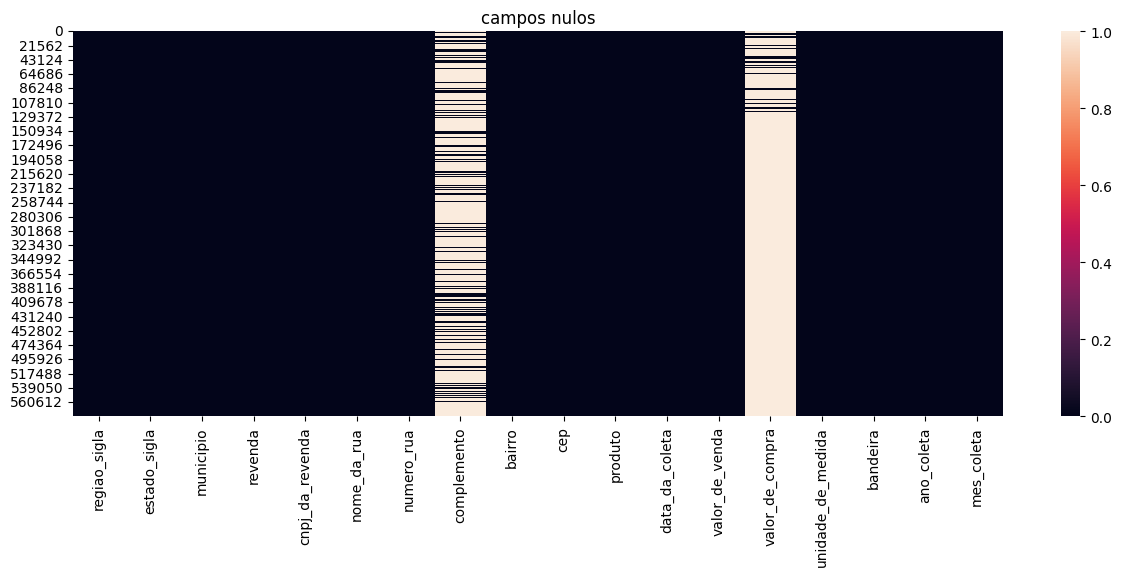

In [27]:
plt.figure(figsize=(15,5))
plt.title('campos nulos')

sns.heatmap(base_dados_sql.isnull())

# cada linha branca indica que o campo ta nulo. No caso aqui apenas no COMPLEMENTO e no VALOR DE COMPRA tem null

In [28]:
base_dados_sql.dtypes

regiao_sigla         object
estado_sigla         object
municipio            object
revenda              object
cnpj_da_revenda      object
nome_da_rua          object
numero_rua           object
complemento          object
bairro               object
cep                  object
produto              object
data_da_coleta       object
valor_de_venda       object
valor_de_compra      object
unidade_de_medida    object
bandeira             object
ano_coleta            int64
mes_coleta            int64
dtype: object

In [29]:
# transformando campos numericos de object para numeric

base_dados_sql.valor_de_venda = base_dados_sql.valor_de_venda.apply(lambda x : x.replace(',','.'))
base_dados_sql.valor_de_venda = pd.to_numeric(base_dados_sql.valor_de_venda)


In [30]:
base_dados_sql.valor_de_venda.describe()


count    582150.000000
mean         94.902217
std          19.242097
min          49.900000
25%          78.000000
50%          98.000000
75%         110.000000
max         160.000000
Name: valor_de_venda, dtype: float64

In [31]:
base_dados_sql.groupby(
    by=['ano_coleta', 'mes_coleta']
).agg(
    qtd=('valor_de_venda', 'count'),
    media=('valor_de_venda', 'mean'),
    mediana=('valor_de_venda', 'median'),
    desvp=('valor_de_venda', 'std'),
    min=('valor_de_venda', 'min'),
    max=('valor_de_venda', 'max')
)

qtd       media  mediana      desvp    min    max
ano_coleta mes_coleta                                                     
2020       1           20793   70.626936   70.000   8.021403  50.00  115.0
           2           17477   70.789624   70.000   7.970337  50.00  115.0
           3           19492   70.843771   70.000   7.901932  50.00  115.0
           4           19240   70.855663   70.000   7.551256  49.99  115.0
           5           17427   70.471334   70.000   7.422980  49.99  115.0
           6           19812   70.581333   70.000   7.589573  49.99  115.0
           7           19378   70.805588   70.000   7.434778  49.90  115.0
           8           12463   71.045171   70.000   7.642308  49.90  115.0
           10           1392   74.971385   75.000   8.570577  50.00  105.0
           11           4801   75.240802   75.000   8.290593  53.00  110.0
           12           7378   76.121099   75.000   7.915294  58.99  110.0
2021       1            7483   77.590409   75.000   7.902238  59.99  105.0
           2            7936   80.537136   80.000   8.160294  58.00  110.0
           3           10402   83.946337   84.900   8.120001  55.99  120.0
           4            9463   85.949628   85.000   7.916333  64.00  120.0
           5           11240   86.442069   85.000   8.323486  64.99  125.0
           6           13756   88.036388   87.990   8.227106  58.00  130.0
           7           13308   92.769183   91.900   8.469092  64.99  130.0
           8           15098   94.419541   94.990   8.329503  65.99  130.0
           9           14906   98.726509   98.000   8.523496  70.00  135.0
           10          14016  101.806548  100.000   8.724941  74.00  135.0
           11          16279  103.535226  103.000   8.712906  75.00  140.0
           12          15765  103.293132  102.000   8.951108  77.99  140.0
2022       1           15161  103.552864  103.000   9.122415  78.00  140.0
           2           15160  103.479899  102.945   9.145857  78.00  140.0
           3           17792  110.563987  110.000  10.992141  78.00  160.0
           4           15760  114.481891  115.000  10.002391  78.00  160.0
           5           18129  113.783853  113.000  10.171544  84.99  160.0
           6           18131  113.542126  113.000  10.308627  72.00  160.0
           7           16371  112.905352  110.000  10.440392  81.99  160.0
           8           19487  112.277794  110.000  10.380565  81.99  160.0
           9            8679  113.160335  113.000  10.176968  81.99  160.0
           10           4162  110.501148  110.000   9.823207  68.00  149.0
           11           7793  110.464954  110.000   9.894538  79.99  150.0
           12          10879  109.647462  110.000  10.752685  80.00  150.0
2023       1           16865  109.100071  109.990  11.142391  77.99  150.0
           2           15664  108.813096  109.900  11.490000  70.00  155.0
           3           17385  108.221444  108.000  11.589806  70.00  155.0
           4           15896  108.327441  108.000  11.854827  74.99  155.0
           5           21102  108.425949  108.000  11.884401  70.00  155.0
           6           18429  104.475325  103.000  12.266492  72.99  155.0

Text(0, 0.5, 'freq')

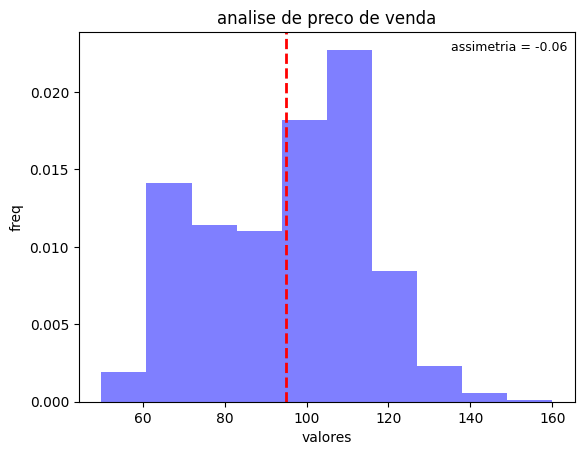

In [32]:
# criar um histograma
plt.title('analise de preco de venda')

# plot
plt.hist(base_dados_sql['valor_de_venda'], bins=10, density=True, alpha=0.5, color='blue')

# adicionar uma media
media_preco = base_dados_sql['valor_de_venda'].mean()
plt.axvline(media_preco, color='red', linestyle='dashed',linewidth=2, label='media')

# assimetria
assimetria = base_dados_sql['valor_de_venda'].skew()
plt.annotate(f'assimetria = {assimetria:.2f}', xy=(0.75, 0.95), xycoords='axes fraction', fontsize=9)

plt.xlabel('valores')
plt.ylabel('freq')

In [33]:
# serie temporal

anl_serie = base_dados_sql.groupby(
    by=['ano_coleta', 'mes_coleta']
).agg(
    media=('valor_de_venda', 'mean')
).reset_index()

anl_serie.head()


,ano_coleta,mes_coleta,media
0,2020,1,70.626936
1,2020,2,70.789624
2,2020,3,70.843771
3,2020,4,70.855663
4,2020,5,70.471334


In [34]:
# criando uma coluna de periodo
anl_serie['periodo'] = anl_serie['ano_coleta'].astype('str') + '-' + anl_serie['mes_coleta'].astype('str') + '-' + '01'
anl_serie['periodo'] = pd.to_datetime(anl_serie['periodo'])
anl_serie.set_index('periodo', inplace=True)

anl_serie.head(5)

,ano_coleta,mes_coleta,media
periodo,,,
2020-01-01,2020,1,70.626936
2020-02-01,2020,2,70.789624
2020-03-01,2020,3,70.843771
2020-04-01,2020,4,70.855663
2020-05-01,2020,5,70.471334


In [35]:
# gestao do minstro da fazenda. Com base na coluna do ano definir qual é o ministro
anl_serie['gestao'] = anl_serie['ano_coleta'].apply(lambda x : 'Guedes' if x < 2023 else 'Haddad')


In [36]:
anl_serie.head()


,ano_coleta,mes_coleta,media,gestao
periodo,,,,
2020-01-01,2020,1,70.626936,Guedes
2020-02-01,2020,2,70.789624,Guedes
2020-03-01,2020,3,70.843771,Guedes
2020-04-01,2020,4,70.855663,Guedes
2020-05-01,2020,5,70.471334,Guedes


In [37]:
anl_serie.tail()


,ano_coleta,mes_coleta,media,gestao
periodo,,,,
2023-02-01,2023,2,108.813096,Haddad
2023-03-01,2023,3,108.221444,Haddad
2023-04-01,2023,4,108.327441,Haddad
2023-05-01,2023,5,108.425949,Haddad
2023-06-01,2023,6,104.475325,Haddad


In [38]:
anl_serie.media.shift(1)

periodo
2020-01-01           NaN
2020-02-01     70.626936
2020-03-01     70.789624
2020-04-01     70.843771
2020-05-01     70.855663
2020-06-01     70.471334
2020-07-01     70.581333
2020-08-01     70.805588
2020-10-01     71.045171
2020-11-01     74.971385
2020-12-01     75.240802
2021-01-01     76.121099
2021-02-01     77.590409
2021-03-01     80.537136
2021-04-01     83.946337
2021-05-01     85.949628
2021-06-01     86.442069
2021-07-01     88.036388
2021-08-01     92.769183
2021-09-01     94.419541
2021-10-01     98.726509
2021-11-01    101.806548
2021-12-01    103.535226
2022-01-01    103.293132
2022-02-01    103.552864
2022-03-01    103.479899
2022-04-01    110.563987
2022-05-01    114.481891
2022-06-01    113.783853
2022-07-01    113.542126
2022-08-01    112.905352
2022-09-01    112.277794
2022-10-01    113.160335
2022-11-01    110.501148
2022-12-01    110.464954
2023-01-01    109.647462
2023-02-01    109.100071
2023-03-01    108.813096
2023-04-01    108.221444
2023-05-01    108

In [39]:
anl_serie['oscilacao'] = ((anl_serie.media / anl_serie.media.shift(1)) -1) * 100
anl_serie.head(5)


,ano_coleta,mes_coleta,media,gestao,oscilacao
periodo,,,,,
2020-01-01,2020,1,70.626936,Guedes,NaN
2020-02-01,2020,2,70.789624,Guedes,0.230347
2020-03-01,2020,3,70.843771,Guedes,0.076490
2020-04-01,2020,4,70.855663,Guedes,0.016786
2020-05-01,2020,5,70.471334,Guedes,-0.542410


In [40]:
dados_inflacao = pd.read_excel('base_Inflacao.xlsx')

dados_inflacao.columns = [x.lower() for x in dados_inflacao.columns]
dados_inflacao.head(5)


,periodo,no_mes,3_meses,6_meses,ano,12_meses
0,2019-01-01,0.32,0.26,1.10,0.32,3.78
1,2019-02-01,0.43,0.90,1.63,0.75,3.89
2,2019-03-01,0.75,1.51,1.90,1.51,4.58
3,2019-04-01,0.57,1.76,2.02,2.09,4.94
4,2019-05-01,0.13,1.46,2.37,2.22,4.66


In [41]:
anl_serie = pd.merge(anl_serie.reset_index(), dados_inflacao, on='periodo', how='left')

anl_serie.head(5)

,periodo,ano_coleta,mes_coleta,media,gestao,oscilacao,no_mes,3_meses,6_meses,ano,12_meses
0,2020-01-01,2020,1,70.626936,Guedes,NaN,0.21,1.88,2.05,0.21,4.19
1,2020-02-01,2020,2,70.789624,Guedes,0.230347,0.25,1.62,2.20,0.46,4.01
2,2020-03-01,2020,3,70.843771,Guedes,0.076490,0.07,0.53,2.31,0.53,3.30
3,2020-04-01,2020,4,70.855663,Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40
4,2020-05-01,2020,5,70.471334,Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88


In [42]:
dados_dolar = pd.read_excel('base_dolar.xlsx')
dados_dolar.columns = [x.lower() for x in dados_dolar.columns]
dados_dolar.head(5)


,periodo,dolar
0,2019-01-01,3.9090
1,2019-02-01,3.7049
2,2019-03-01,3.7155
3,2019-04-01,3.8344
4,2019-05-01,3.8730


In [43]:
anl_serie = pd.merge(anl_serie.reset_index(), dados_dolar, on='periodo', how='left')
anl_serie.head(5)

,index,periodo,ano_coleta,mes_coleta,media,gestao,oscilacao,no_mes,3_meses,6_meses,ano,12_meses,dolar
0,0,2020-01-01,2020,1,70.626936,Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949
1,1,2020-02-01,2020,2,70.789624,Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622
2,2,2020-03-01,2020,3,70.843771,Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163
3,3,2020-04-01,2020,4,70.855663,Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362
4,4,2020-05-01,2020,5,70.471334,Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579


In [44]:
dados_petroleo = pd.read_excel('base_petroleo.xlsx')
dados_petroleo.columns = [x.lower() for x in dados_petroleo.columns]

dados_petroleo.head(5)



,periodo,indice_brent
0,2023-06-01,74.90
1,2023-05-01,72.66
2,2023-04-01,79.54
3,2023-03-01,79.77
4,2023-02-01,83.89


In [45]:
anl_serie = pd.merge(anl_serie.reset_index(), dados_petroleo, on='periodo', how='left')
anl_serie.head(5)


,level_0,index,periodo,ano_coleta,mes_coleta,media,gestao,oscilacao,no_mes,3_meses,6_meses,ano,12_meses,dolar,indice_brent
0,0,0,2020-01-01,2020,1,70.626936,Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16
1,1,1,2020-02-01,2020,2,70.789624,Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52
2,2,2,2020-03-01,2020,3,70.843771,Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74
3,3,3,2020-04-01,2020,4,70.855663,Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27
4,4,4,2020-05-01,2020,5,70.471334,Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33


In [46]:
# excluir colunas
anl_serie.drop(columns=['index'], inplace=True)
anl_serie.set_index('periodo', inplace=True)

anl_serie.head(5)

,level_0,ano_coleta,mes_coleta,media,gestao,oscilacao,no_mes,3_meses,6_meses,ano,12_meses,dolar,indice_brent
periodo,,,,,,,,,,,,,
2020-01-01,0,2020,1,70.626936,Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16
2020-02-01,1,2020,2,70.789624,Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52
2020-03-01,2,2020,3,70.843771,Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74
2020-04-01,3,2020,4,70.855663,Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27
2020-05-01,4,2020,5,70.471334,Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33


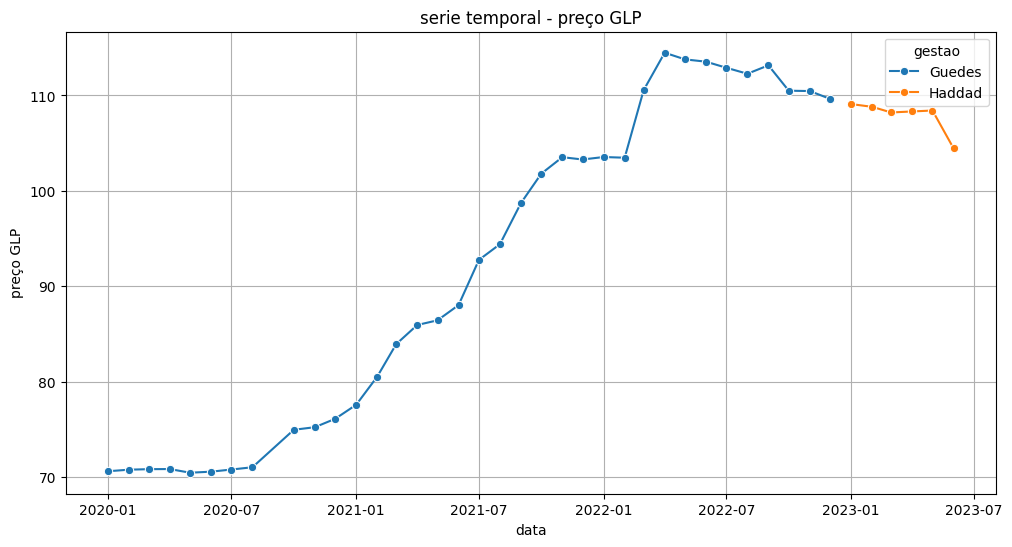

In [47]:
# criando serie temporal

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=anl_serie.reset_index(),
    x='periodo',
    y='media',
    hue='gestao',
    marker='o',
    linestyle='-')

plt.title('serie temporal - preço GLP')
plt.xlabel('data')
plt.ylabel('preço GLP')

plt.grid(visible=True, axis='both')

Text(0.5, 1.0, 'Matriz de Correlação')

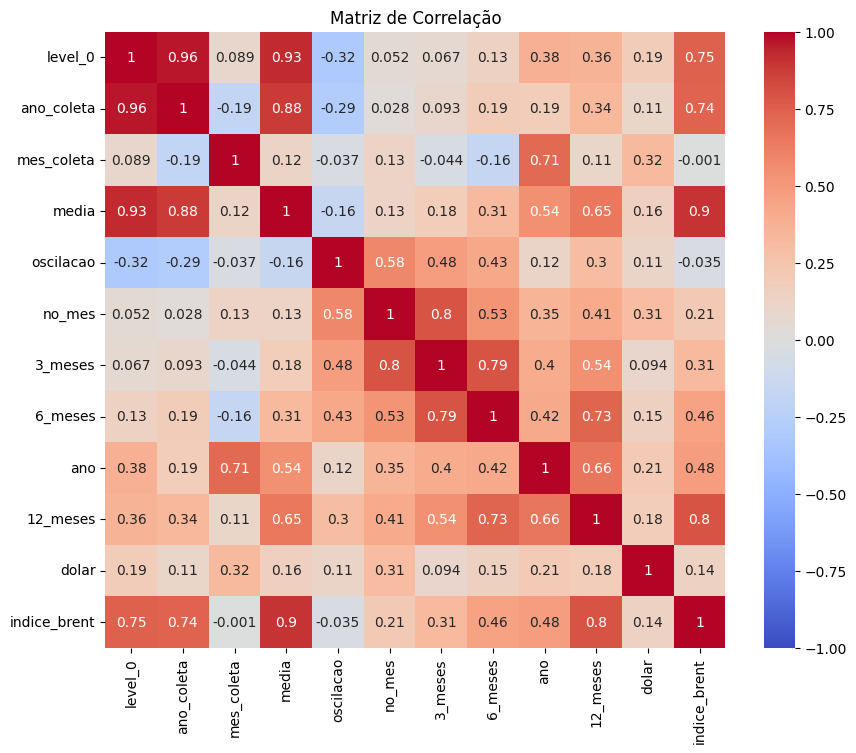

In [48]:
# Anl de Correação
anl_serie.drop(columns=['gestao','level_0'])
matrix_cor = anl_serie.drop(columns='gestao')

matrix_cor = matrix_cor.corr()

# Plot
plt.figure( figsize=(10, 8) )
sns.heatmap( matrix_cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')

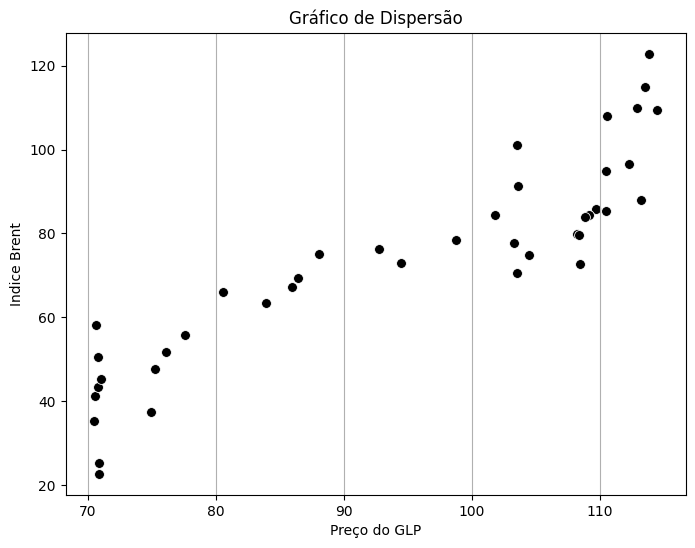

In [49]:
# GLP + Brent
plt.figure(figsize=(8, 6))
sns.scatterplot(data=anl_serie, x='media', y='indice_brent',
                color='black', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(visible=True, axis='x')

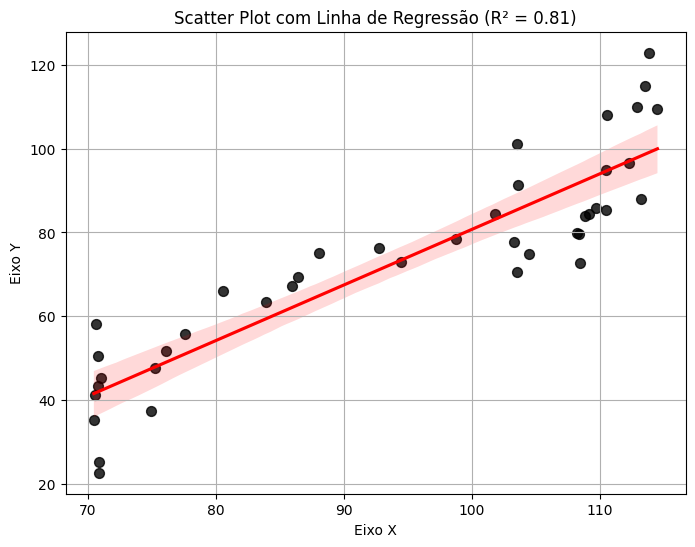

In [50]:
# Gráfico de dispersão + Linha da Regressão + r²

# Libs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Treinar uma regressão
x = anl_serie['indice_brent'].values.reshape(-1, 1)
y = anl_serie['media'].values.reshape(-1, 1)

# Treinao da Regressão
Regressor = LinearRegression()
Regressor.fit(x, y)

# Calcule o coeficiente de determinação (R²)
y_pred = Regressor.predict(x)
r2 = r2_score(y, y_pred)

# Tamanho da Imagem
plt.figure(figsize=(8, 6))

# Plot
sns.regplot(
    data=anl_serie, x='media', y='indice_brent', color='black',
    scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title(f'Scatter Plot com Linha de Regressão (R² = {r2:.2f})')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.grid(True)

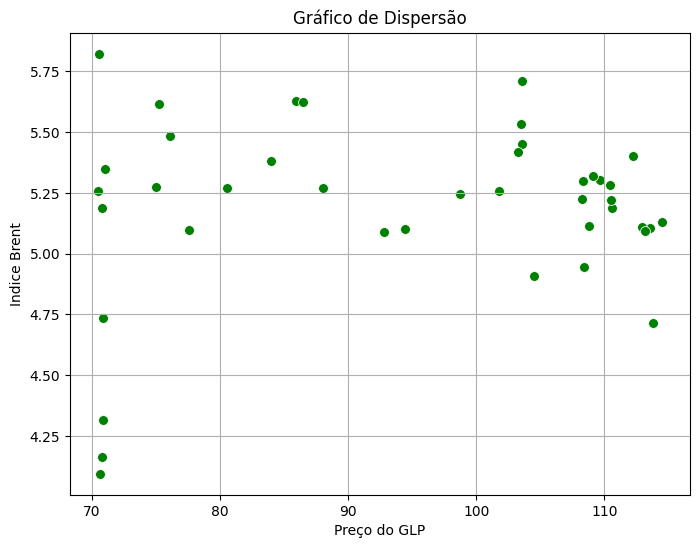

In [51]:
# GLP x Dólar
plt.figure(figsize=(8, 6))
sns.scatterplot(data=anl_serie, x='media', y='dolar', color='green', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(True)

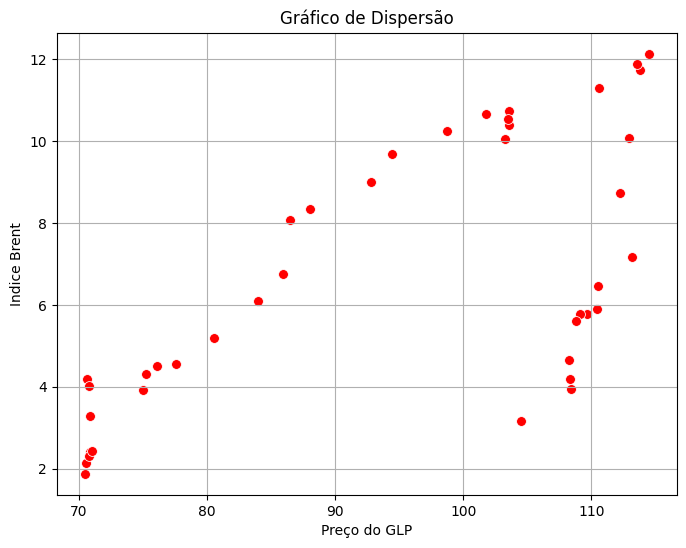

In [52]:
# GLP x IPCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=anl_serie, x='media', y='12_meses', color='red', marker='o', s=50)
plt.title('Gráfico de Dispersão')
plt.xlabel('Preço do GLP')
plt.ylabel('Indice Brent')
plt.grid(True)

In [53]:
# Analisar o aumento do preço desde 2020
anl_serie['aumento_preco'] = anl_serie.media - anl_serie.media[0]
anl_serie['ano_mes'] = anl_serie['ano_coleta'].astype('str').apply(lambda x: x[2:4]) + '-' + anl_serie['mes_coleta'].astype('str')

anl_serie.head()

,level_0,ano_coleta,mes_coleta,media,gestao,oscilacao,no_mes,3_meses,6_meses,ano,12_meses,dolar,indice_brent,aumento_preco,ano_mes
periodo,,,,,,,,,,,,,,,
2020-01-01,0,2020,1,70.626936,Guedes,NaN,0.21,1.88,2.05,0.21,4.19,4.0949,58.16,0.000000,20-1
2020-02-01,1,2020,2,70.789624,Guedes,0.230347,0.25,1.62,2.20,0.46,4.01,4.1622,50.52,0.162687,20-2
2020-03-01,2,2020,3,70.843771,Guedes,0.076490,0.07,0.53,2.31,0.53,3.30,4.3163,22.74,0.216834,20-3
2020-04-01,3,2020,4,70.855663,Guedes,0.016786,-0.31,0.01,1.89,0.22,2.40,4.7362,25.27,0.228726,20-4
2020-05-01,4,2020,5,70.471334,Guedes,-0.542410,-0.38,-0.62,0.99,-0.16,1.88,5.2579,35.33,-0.155602,20-5


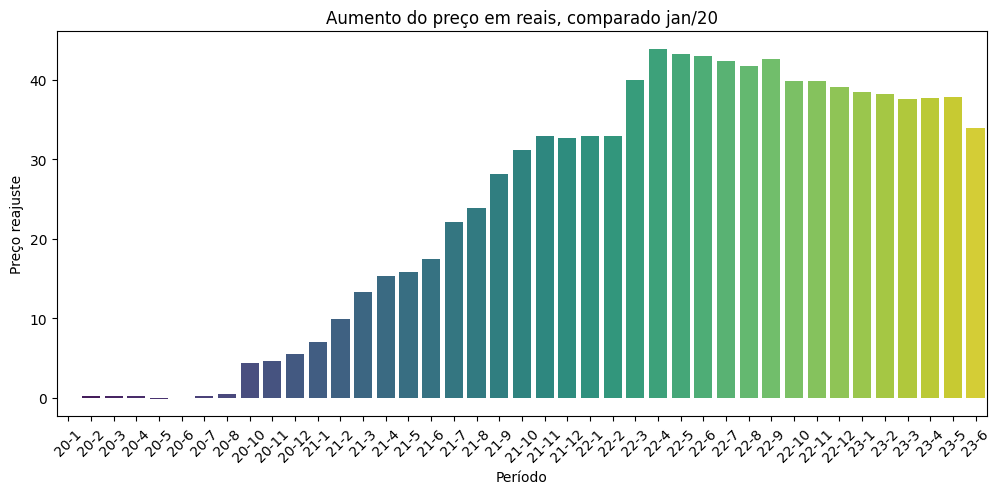

In [54]:
# Serie Temporal
plt.figure( figsize=(12, 5) )
sns.barplot(data=anl_serie.reset_index(), x='ano_mes', y='aumento_preco', palette='viridis')
plt.title('Aumento do preço em reais, comparado jan/20')
plt.xlabel('Período')
plt.ylabel('Preço reajuste')
plt.xticks(rotation=45)
plt.grid(False)

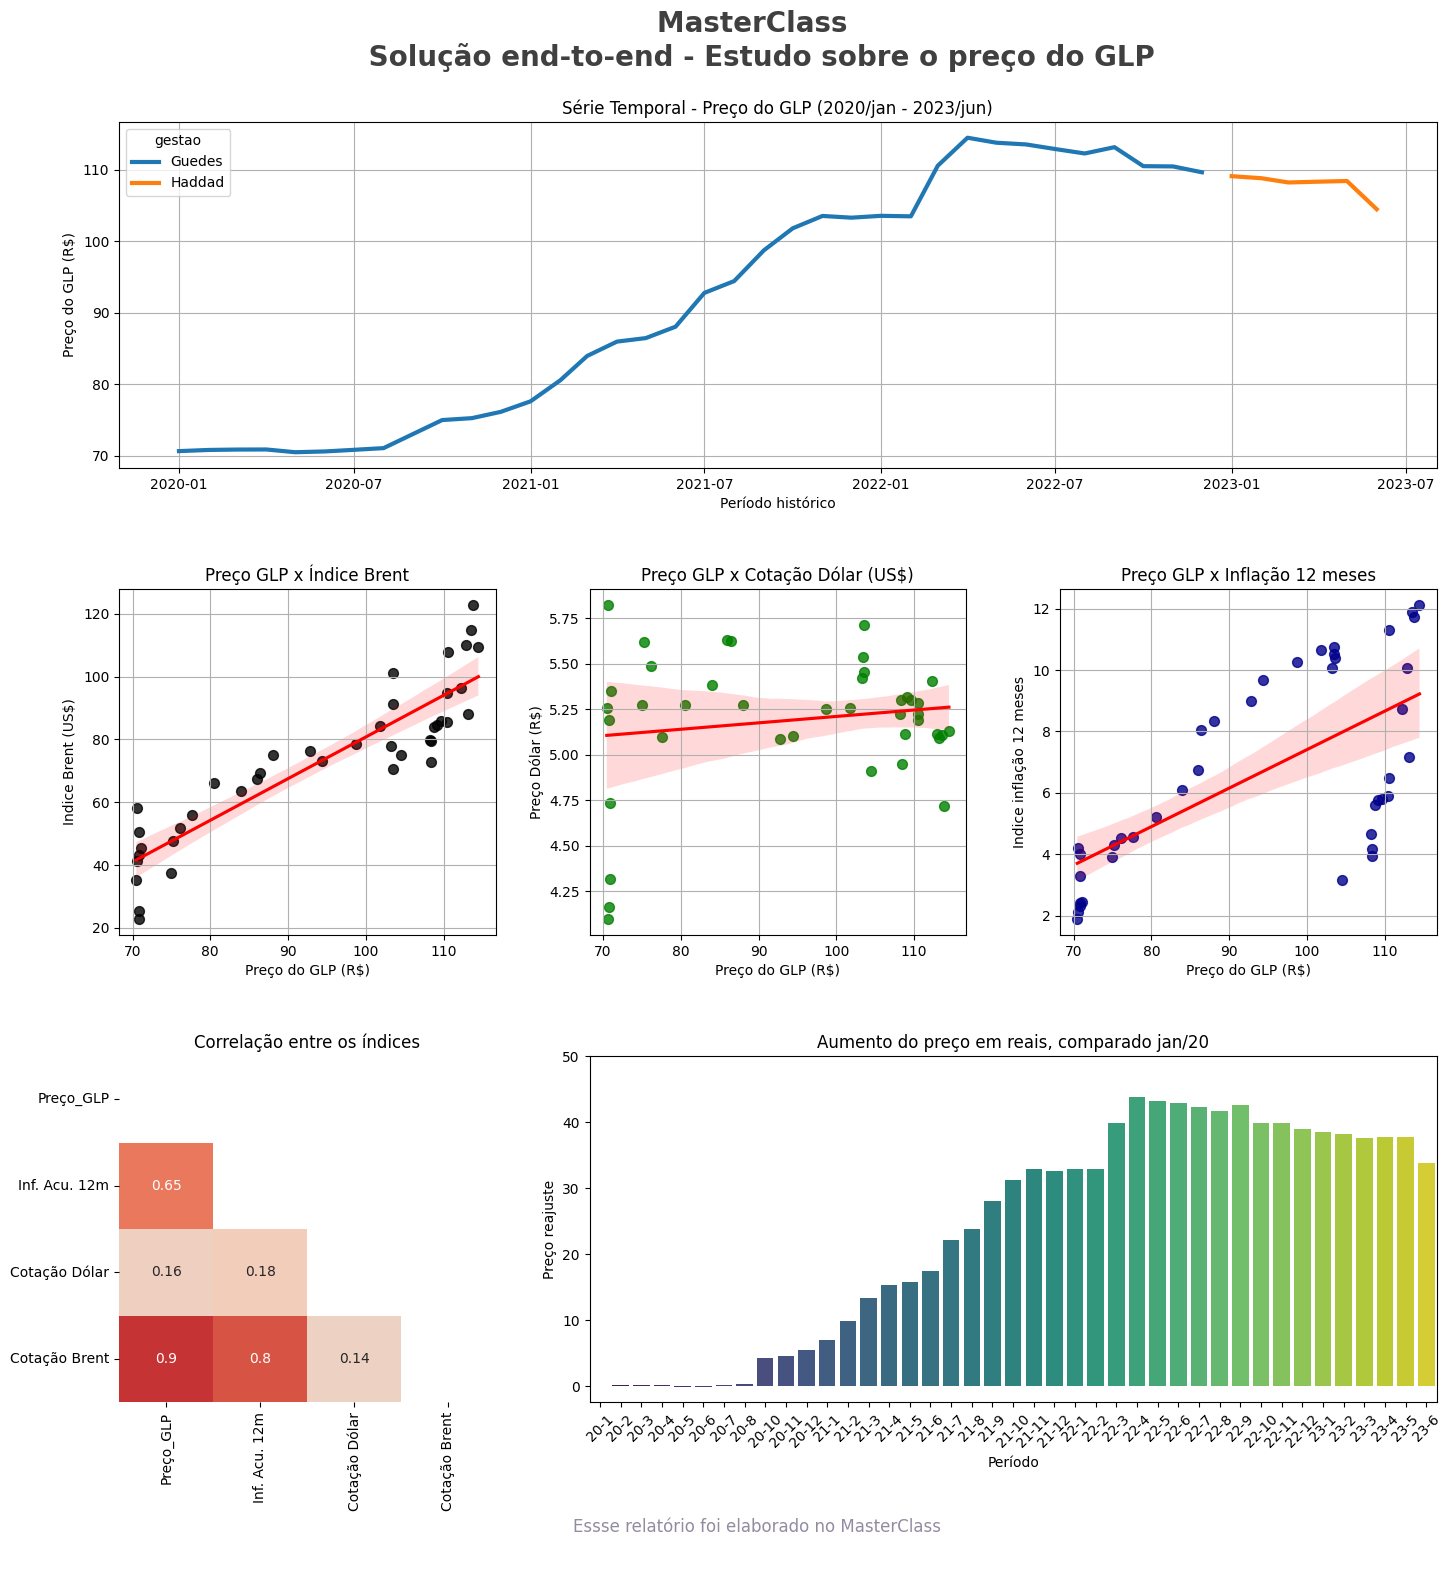

In [55]:
produto = plt.figure( figsize=(17, 16) ) # initialize figure

# Titulo da figura
plt.suptitle('MasterClass \n Solução end-to-end - Estudo sobre o preço do GLP', fontsize=20, color='#404040', fontweight=600 )

# Lista com os eixos
Eixos = [ None for Loop in range(6) ]

# 3 linhas 3 colunas
Estrutura_Grid = (3, 3)

Eixos[0] = plt.subplot2grid( Estrutura_Grid, (0, 0), colspan=3 )
sns.lineplot(
    data=anl_serie.reset_index(), x='periodo', y='media',
    hue='gestao', linestyle='-', linewidth=3)
plt.title('Série Temporal - Preço do GLP (2020/jan - 2023/jun)')
plt.xlabel('Período histórico')
plt.ylabel('Preço do GLP (R$)')
plt.grid(True)


Eixos[1] = plt.subplot2grid( Estrutura_Grid, (1,0), colspan=1 )
sns.regplot(  data=anl_serie, x='media', y='indice_brent', color='black', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Índice Brent')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Indice Brent (US$)')
plt.grid(True)

Eixos[2] = plt.subplot2grid( Estrutura_Grid, (1,1), colspan=1 )
sns.regplot( data=anl_serie, x='media', y='dolar', color='green', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Cotação Dólar (US$)')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Preço Dólar (R$)')
plt.grid(True)

Eixos[3] = plt.subplot2grid( Estrutura_Grid, (1,2), colspan=1 )
sns.regplot( data=anl_serie, x='media', y='12_meses', color='darkblue', scatter_kws={'s': 50}, line_kws={'color': 'red'} )
plt.title('Preço GLP x Inflação 12 meses')
plt.xlabel('Preço do GLP (R$)')
plt.ylabel('Indice inflação 12 meses')
plt.grid(True)

Eixos[4] = plt.subplot2grid( Estrutura_Grid, (2,0), colspan=1 )
correlation_matrix = anl_serie[['media', '12_meses','dolar', 'indice_brent']]
correlation_matrix.columns = ['Preço_GLP', 'Inf. Acu. 12m', 'Cotação Dólar', 'Cotação Brent']
correlation_matrix = correlation_matrix.corr()
mask = np.triu(correlation_matrix)
sns.heatmap( correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, mask=mask)
plt.title('Correlação entre os índices')

Eixos[5] = plt.subplot2grid( Estrutura_Grid, (2,1), colspan=2)
sns.barplot(data=anl_serie.reset_index(), x='ano_mes', y='aumento_preco', palette='viridis')
plt.title('Aumento do preço em reais, comparado jan/20')
plt.xlabel('Período')
plt.ylabel('Preço reajuste')
plt.xticks(rotation=45)
plt.yticks(range(0, 60, 10))

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.25, top=0.91 )

# Rodapé
Rodape = '''
Essse relatório foi elaborado no MasterClass

'''

# Incluindo o rodape no relatorio
produto.text( 0.5, 0, Rodape, ha='center', va='bottom', size=12, color='#938ca1');